In [1]:
import requests
import numpy as np
import pandas as pd
import requests
import json
import time
from datetime import datetime
from datetime import timedelta
from collections import Counter


  #https://docs.reservoir.tools/reference/geteventsasksv3
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt


###Penguins traits

In [ ]:
#The first script
url = "https://api.opensea.io/api/v2/chain/ethereum/contract/0xbd3531da5cf5857e7cfaa92426877b022e612cf8/nfts/1000"
headers = {
    "accept": "application/json",
    "x-api-key": api
}
r = requests.get(url, headers=headers)
json_data = json.loads(r.text)
df = pd.json_normalize(json_data, record_path=['nft', 'traits'], meta= [['nft','identifier']]) # this parameter adjust to new queries

In [ ]:
df

,trait_type,display_type,max_value,trait_count,order,value,nft.identifier
0,Skin,None,None,1189,None,Light Gray,1000
1,Face,None,None,864,None,Normal,1000
2,Background,None,None,710,None,Pink,1000
3,Head,None,None,88,None,Biker Helmet,1000
4,Body,None,None,199,None,Apron,1000


In [82]:
#Original function, to make 
#df_all= pd.Series([])
#null_mayc = []
for i in range(5124,6000):
    print(i)
    url = 'https://api.opensea.io/api/v2/chain/ethereum/contract/0xbd3531da5cf5857e7cfaa92426877b022e612cf8/nfts/'+f'{i}'
    headers = {
    "accept": "application/json",
    "x-api-key": api
    }
    r = requests.get(url, headers=headers)
    json_data = json.loads(r.text)
    time.sleep(0.5)
    
    try:
        df = pd.json_normalize(json_data, record_path=['nft', 'traits'], meta= [['nft','identifier']]) # this parameter adjust to new queries
        df_all = pd.concat([df_all, df])
    except KeyError:
           continue

2285
6712


In [ ]:
df_all

In [52]:
df_all.drop_duplicates(inplace=True)

In [85]:
penguins_trait = pd.pivot(df_all, columns='trait_type', index='nft.identifier', values= 'value')

In [43]:
Counter(pd.to_numeric(penguins_trait_1.index).isin(list(range(6000,8888))))

Counter({True: 2887})

In [21]:
penguins_trait.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8886 entries, 0 to 8885
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Background  8886 non-null   object
 1   Body        8886 non-null   object
 2   Face        8886 non-null   object
 3   Head        8886 non-null   object
 4   Skin        8886 non-null   object
dtypes: object(5)
memory usage: 347.2+ KB


In [91]:
penguins_trait = penguins_trait.reset_index()

In [92]:
penguins_trait['nft.identifier'] = pd.to_numeric(penguins_trait['nft.identifier'])
penguins_trait.sort_values('nft.identifier',inplace=True)
penguins_trait.index=range(len(penguins_trait))


In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=penguins_trait['nft.identifier'],nbinsx=20))
fig.update_layout(title='Distribution of penguins token ID',
                   xaxis_title='Token ID',
                   width =900, height = 600, bargap= 0.1)
fig.show()

#Penguins event

In [7]:
%store -r penguins_trait

In [8]:
len(penguins_trait['nft.identifier'].unique())

8888

In [9]:
num = list(range(2220,2230))
contract = '0xbd3531da5cf5857e7cfaa92426877b022e612cf8'
headers = {
    "accept": "*/*",
    "x-api-key": event_api
}
""" url = "https://api.reservoir.tools/sales/v6?tokens=0x79fcdef22feed20eddacbb2587640e45491b757f%3A394"

headers = {
    "accept": "*/*",
    "x-api-key": "6270fbfb-d539-5f94-808f-af868ffb1f95"
}

r = requests.get(url, headers=headers)
json_data = json.loads(r.text)
df_loop = pd.json_normalize(json_data, record_path=['sales']) """
#Function need
def get_sales(num):
    print(num, f'Time: {datetime.now().isoformat(timespec="seconds")}')
    url = "https://api.reservoir.tools/sales/v6?"+'&'.join([f'tokens={contract}%3A{str(i)}' for i in num])+ '&limit=1000'
    r= requests.get(url, headers=headers)
    json_data = json.loads(r.text)
    #df = pd.json_normalize(json_data, record_path=['sales', 'traits'], meta= [['nft','identifier']]) # this parameter adjust to new queries
    df_loop = pd.json_normalize(json_data, record_path=['sales'])
    df_continue = pd.json_normalize(json_data) # this parameter adjust to new queries
    
    #followup if the continue is not null
    while df_continue.loc[0]['continuation']:
        continuation = df_continue.loc[0]['continuation']
        url = "https://api.reservoir.tools/sales/v6?"+'&'.join([f'tokens={contract}%3A{str(i)}' for i in num])+ '&limit=1000'+'&continuation='+ f'{continuation}'
        r = requests.get(url, headers=headers)
        
        json_data = json.loads(r.text)
        #df = pd.json_normalize(json_data, record_path=['sales', 'traits'], meta= [['nft','identifier']]) # this parameter adjust to new queries
        df_loop_continue = pd.json_normalize(json_data, record_path=['sales'])
        df_continue = pd.json_normalize(json_data)
        df_loop = pd.concat([df_loop, df_loop_continue])
    
    return df_loop

In [10]:
url = "https://api.reservoir.tools/sales/v6?tokens=0x79fcdef22feed20eddacbb2587640e45491b757f%3A111&limit=2&continuation=MTY3MzgzMjQ0M18xNDBfMV8xMzY2ODAwMDAwMDAwMDAwMDAw"


In [11]:
df = pd.Series([])

In [ ]:
""" for i in list(range(0, 10)):
    num= list(range(i*10,i*10+10))
    print(num)
    url = "https://api.reservoir.tools/sales/v6?"+'&'.join([f'tokens={contract}%3A{str(i)}' for i in num])
    r= requests.get(url, headers=headers)
    json_data = json.loads(r.text)
    #df = pd.json_normalize(json_data, record_path=['sales', 'traits'], meta= [['nft','identifier']]) # this parameter adjust to new queries
    df_loop = pd.json_normalize(json_data, record_path=['sales']) # this parameter adjust to new queries
    df=pd.concat([df，df_loop])
     """
#Formal Loop
for i in list(range(364,890)):
    #num= list(range(i*10,i*10+10))
    num = penguins_trait['nft.identifier'].loc[i*10:i*10+10]
    df_loop = get_sales(num)
    if len(df_loop) ==0: #Some tokens do not have trading yet
        continue
    elif len(df_loop) >1000:
        break
    else:
        df=pd.concat([df,df_loop])
        time.sleep(0.5)


In [15]:
df['token.tokenId']

0        9
1        2
2       10
3        3
4       10
      ... 
48    8884
49    8883
50    8882
51    8881
52    8880
Name: token.tokenId, Length: 91211, dtype: object

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91211 entries, 0 to 52
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   0                        0 non-null      object 
 1   id                       91211 non-null  object 
 2   saleId                   91211 non-null  object 
 3   orderId                  80733 non-null  object 
 4   orderSource              81414 non-null  object 
 5   orderSide                91211 non-null  object 
 6   orderKind                91211 non-null  object 
 7   from                     91211 non-null  object 
 8   to                       91211 non-null  object 
 9   amount                   91211 non-null  object 
 10  fillSource               81426 non-null  object 
 11  block                    91211 non-null  float64
 12  txHash                   91211 non-null  object 
 13  logIndex                 91211 non-null  float64
 14  batchIndex               91211

In [ ]:
df['token.tokenId']

In [18]:
penguins_event_raw = df.copy()
penguins_event = df.copy()

In [19]:
penguins_event['token.tokenId'] = pd.to_numeric(penguins_event['token.tokenId'])
penguins_event['timestamp'] = pd.to_datetime(penguins_event['timestamp'], unit='s')
penguins_event_raw = penguins_event.copy()
penguins_event['price.currency.symbol'].value_counts()

In [20]:
penguins_event = penguins_event_raw[['orderSide','orderSource','orderKind','from', 'to','block', 'txHash', 'timestamp',
           'washTradingScore','token.contract','token.tokenId','price.currency.symbol','price.amount.decimal', 'price.amount.usd']]
penguins_event.drop_duplicates(inplace=True)
penguins_event.index = range(len(penguins_event))
penguins_event.index
%store penguins_event_raw
%store penguins_event

<ipython-input-20-4cf4fbaaf338>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_event.drop_duplicates(inplace=True)


Stored 'penguins_event_raw' (DataFrame)
Stored 'penguins_event' (DataFrame)


Penguins general analysis

In [46]:
%store -r penguins_trait penguins_event

In [47]:
penguins_event.describe()

,block,timestamp,washTradingScore,token.tokenId,price.amount.decimal,price.amount.usd
count,8.261100e+04,82611,82611.000000,82611.000000,82611.000000,8.261100e+04
mean,1.501823e+07,2022-06-12 07:23:38.651499264,0.058890,4508.145949,4.129647,6.366540e+03
min,1.287628e+07,2021-07-22 12:47:48,0.000000,0.000000,0.000000,0.000000e+00
25%,1.298885e+07,2021-08-09 04:48:11,0.000000,2251.000000,0.700000,1.892252e+03
50%,1.450104e+07,2022-04-01 14:53:50,0.000000,4542.000000,2.900000,6.825022e+03
75%,1.686274e+07,2023-03-19 15:46:11,0.000000,6777.000000,4.810000,8.606139e+03
max,1.877492e+07,2023-12-13 04:38:11,1.000000,8887.000000,12000.000000,1.395743e+06
std,2.059697e+06,NaN,0.235421,2579.133755,92.751337,9.705998e+03


In [48]:
a = pd.DataFrame(penguins_event['orderSource'].value_counts())
a.reset_index(inplace=True)
a.sort_values('count' ,ascending=False)

,orderSource,count
0,opensea.io,40342
1,blur.io,30423
2,looksrare.org,1087
3,sudoswap.xyz,705
4,nftx.io,421
5,element.market,345
6,x2y2.io,296
7,caviar.sh,45
8,gem.xyz,16
9,reservoir.tools,8


In [49]:
#Make a pie chart according to source
a = penguins_event['orderSource'].value_counts()
c = pd.Series(sum(a[4:]), index= ['others']) #Create a new
b = a[:4].add(c, fill_value=0).sort_values(ascending=False)
labels= b.index
values= b
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(title_text = "Penguinss trades in NFT marketplaces", width =500, height = 400)
fig.show()

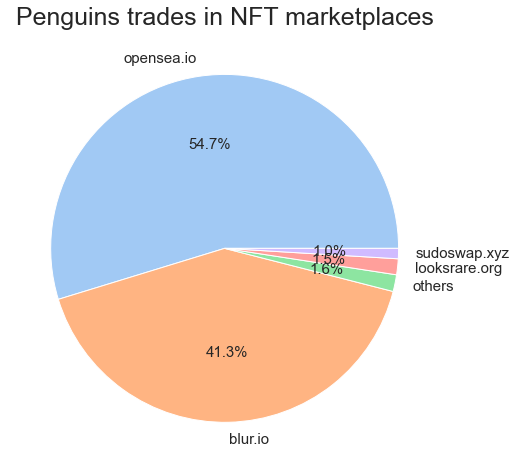

In [50]:
#Opensea is still the 
sns.set_theme(style="whitegrid", palette="pastel")
fig = plt.figure(1, figsize=(8,8))
ax = fig.add_subplot()
ax.pie(b ,labels=labels, autopct='%1.1f%%', textprops={'fontsize': 15})
plt.title('Penguins trades in NFT marketplaces', fontsize = 25)
plt.show()

In [51]:
penguins = penguins_event.merge(penguins_trait, how='left', left_on='token.tokenId', right_index= True )

In [52]:
penguins['orderKind'].value_counts()

orderKind
wyvern-v2           31132
blur                20219
mint                 8888
blur-v2              7810
seaport              4169
wyvern-v2.3          3304
blend                2395
seaport-v1.5         1335
looks-rare           1037
sudoswap              705
seaport-v1.4          447
nftx                  421
element-erc721        345
x2y2                  296
looks-rare-v2          50
caviar-v1              45
rarible                 5
zeroex-v4-erc721        4
zora-v3                 1
nft-trader              1
zeroex-v2               1
forward                 1
Name: count, dtype: int64

In [53]:
penguins_event.columns

Index(['orderSide', 'orderSource', 'orderKind', 'from', 'to', 'block',
       'txHash', 'timestamp', 'washTradingScore', 'token.contract',
       'token.tokenId', 'price.currency.symbol', 'price.amount.decimal',
       'price.amount.usd'],
      dtype='object')

In [54]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=penguins[penguins['orderKind']== 'mint']['timestamp'],nbinsx= 10))
fig.update_layout(title_text = "penguins mint process", 
                  width =900, height = 600, bargap= 0.1,
                  xaxis_title_text='Mint date', yaxis_title_text='Mint count',
                  barmode = 'stack'
                  )
fig.show()

<ipython-input-55-bcf1749e6389>:5: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(18830.541666666668, 0, '07-22 13'),
 Text(18830.583333333332, 0, '07-22 14'),
 Text(18830.625, 0, '07-22 15'),
 Text(18830.666666666668, 0, '07-22 16'),
 Text(18830.708333333332, 0, '07-22 17'),
 Text(18830.75, 0, '07-22 18'),
 Text(18830.791666666668, 0, '07-22 19'),
 Text(18830.833333333332, 0, '07-22 20')]

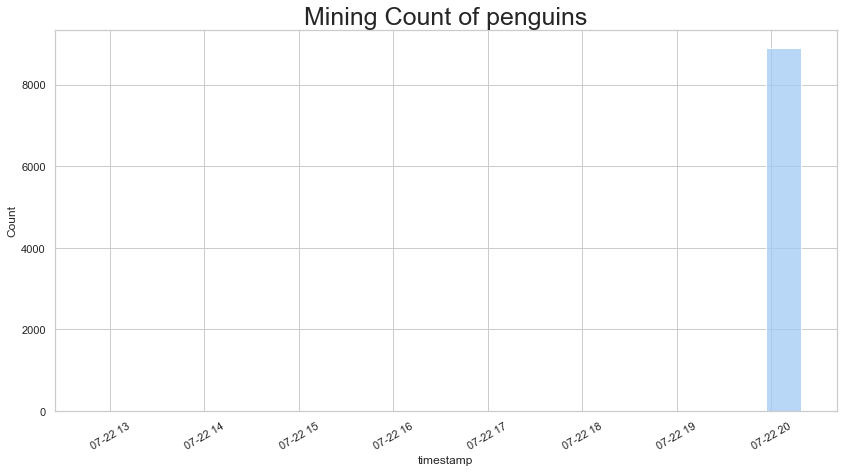

In [55]:
sns.set_theme(style="whitegrid", palette="pastel")
plt.figure(figsize=(14,7))
a = sns.histplot(data = penguins, x=penguins[penguins['orderKind']== 'mint']['timestamp'], bins=20)
plt.title('Mining Count of penguins', fontsize = 25)
a.set_xticklabels(a.get_xticklabels() ,rotation=30)


In [56]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=penguins[penguins['orderKind'] != 'mint']['timestamp'],nbinsx=40))
fig.update_layout(title_text = "Penguins transaction count", 
                  width =900, height = 600, bargap= 0.1,
                  xaxis_title_text='Transaction date', yaxis_title_text='trade count',
                  barmode = 'stack'
                  )
fig.show()

In [57]:
pd.Series([i.week for i in penguins['timestamp']]).head()

0    49
1    48
2    45
3    44
4    44
dtype: int64

In [58]:
penguins['price.currency.symbol'].value_counts() #All trades with ETH and WETH

price.currency.symbol
ETH     79843
WETH     2756
USDC       10
DAI         2
Name: count, dtype: int64

In [59]:
penguins['month'] =penguins['timestamp'].dt.to_period('m')

In [60]:
penguins['price.currency.symbol'].value_counts()

price.currency.symbol
ETH     79843
WETH     2756
USDC       10
DAI         2
Name: count, dtype: int64

In [61]:
penguins.columns

Index(['orderSide', 'orderSource', 'orderKind', 'from', 'to', 'block',
       'txHash', 'timestamp', 'washTradingScore', 'token.contract',
       'token.tokenId', 'price.currency.symbol', 'price.amount.decimal',
       'price.amount.usd', 'nft.identifier', 'Background', 'Body', 'Face',
       'Head', 'Skin', 'month'],
      dtype='object')

In [62]:
week = pd.Series([i.week for i in penguins['timestamp']])
year = pd.Series([i.year for i in penguins['timestamp']])
penguins['week_yr'] = pd.to_datetime(year.astype(str) + ' ' + week.astype(str) + ' 1',
                                format='%Y %U %w')

In [63]:
penguins.columns

Index(['orderSide', 'orderSource', 'orderKind', 'from', 'to', 'block',
       'txHash', 'timestamp', 'washTradingScore', 'token.contract',
       'token.tokenId', 'price.currency.symbol', 'price.amount.decimal',
       'price.amount.usd', 'nft.identifier', 'Background', 'Body', 'Face',
       'Head', 'Skin', 'month', 'week_yr'],
      dtype='object')

In [64]:
penguins[penguins['week_yr'] == '2023-07-24']['token.tokenId'].value_counts().head()

token.tokenId
4964    11
8688    10
5712    10
180     10
7678     9
Name: count, dtype: int64

In [101]:
penguins[penguins['week_yr'] == '2023-07-24'][['from', 'to','txHash', 'timestamp', 'token.tokenId', 'price.currency.symbol', 'price.amount.decimal']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 359 entries, 1258 to 81788
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   from                   359 non-null    object        
 1   to                     359 non-null    object        
 2   txHash                 359 non-null    object        
 3   timestamp              359 non-null    datetime64[ns]
 4   token.tokenId          359 non-null    int64         
 5   price.currency.symbol  359 non-null    object        
 6   price.amount.decimal   359 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 22.4+ KB


In [ ]:
penguins_event['price.currency.symbol'].isin(['ETH','WETH'])

In [67]:
#penguins['month'] =penguins['timestamp'].dt.to_period('m')
penguins['price.currency.symbol'].value_counts()
linechart = penguins[penguins['price.currency.symbol'].isin(['ETH','WETH'])][['week_yr','price.amount.decimal']].groupby(by = 'week_yr', as_index=False).mean()
linechart.head()

,week_yr,price.amount.decimal
0,2021-07-19,0.034147
1,2021-07-26,0.049049
2,2021-08-02,0.291282
3,2021-08-09,2.259698
4,2021-08-16,2.386826


In [68]:
linechart['week_yr'] = linechart['week_yr'].astype(str)
fig = px.line(linechart.loc[:len(linechart)-2], x="week_yr", y="price.amount.decimal", markers= False)
#fig = px.line(linechart, x="month", y="price.amount.usd", text = 'month')
fig.update_traces(textposition="bottom right")
fig.update_layout(title='penguins weekly average price in ETH',
                   xaxis_title='Week',
                   yaxis_title='ETH')
fig.show()

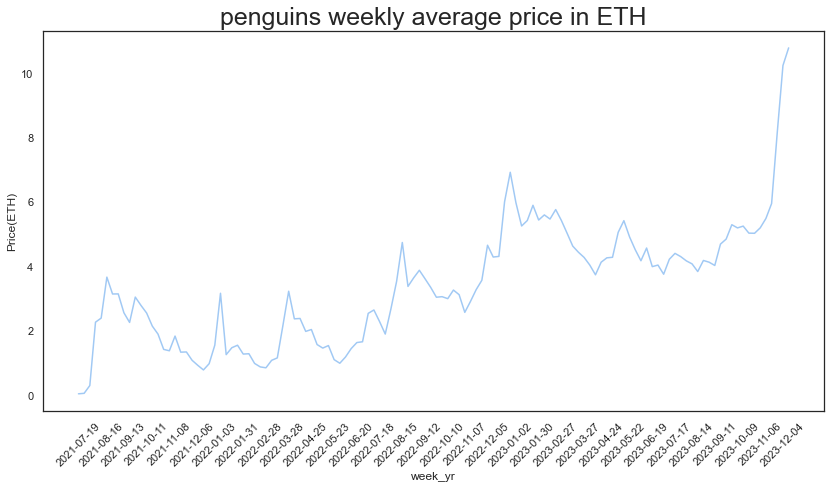

In [74]:
sns.set_theme(style="white", palette="pastel")
plt.figure(figsize=(14,7))
#a = sns.lineplot(box_group, x='Month_year', y='price',hue='marketplace_event_type')
a = sns.lineplot(linechart.loc[:len(linechart)-2], x='week_yr', y='price.amount.decimal', markers= True)
a.set(ylabel='Price(ETH)')
plt.title('penguins weekly average price in ETH', fontsize =25)
#a.set_xticklabels(a.get_xticklabels() ,rotation=30)
a.tick_params(axis='x', labelrotation = 45)
a.xaxis.set_major_locator(plt.MaxNLocator(40))

Price analysis of penguins (Separate by traits)

In [116]:
%store -r penguins

Stored 'penguins' (DataFrame)


In [89]:
#Need to separate penguins to precious penguins (zombie, ape and alien penguins)
penguins['Skin'].value_counts()

Skin
Normal          25383
Dark Gray       12892
Light Gray      11192
Olive Green      6957
Maroon           6909
Baby Pink        6031
Cream            5921
Mint             3457
Red              2641
Leopard Pink      473
Leopard Gray      453
Gold              211
Ice                73
Navy Blue          14
Black               4
Name: count, dtype: int64

In [88]:
a =pd.Series(np.repeat(np.nan, len(penguins)))
for i in range(len(penguins)):
    if penguins['Skin'].loc[i] == 'Normal':
        a.loc[i] = 'Normal'
    elif penguins['Skin'].loc[i] == 'Dark Gray':
        a.loc[i] = 'Dark Gray'
    elif penguins['Skin'].loc[i] == 'Light Gray':
        a.loc[i] = 'Light Gray'
    else:
        a.loc[i] = 'Other penguins'

<ipython-input-88-46e611df2665>:10: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Other penguins' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



In [90]:
penguins['penguins_Skin'] = a
penguins['penguins_Skin'].value_counts()

penguins_Skin
Other penguins    33144
Normal            25383
Dark Gray         12892
Light Gray        11192
Name: count, dtype: int64

In [91]:
week = pd.Series([i.week for i in penguins['timestamp']])
year = pd.Series([i.year for i in penguins['timestamp']])
penguins['week_yr'] = pd.to_datetime(year.astype(str) + ' ' + week.astype(str) + ' 1',
                                format='%Y %U %w')

In [92]:
#All penguins transaction are in ETH and WETH
linechart = penguins[penguins['price.currency.symbol'].isin(['ETH','WETH'])][['week_yr','penguins_Skin','price.amount.decimal']].groupby(by = ['week_yr','penguins_Skin'], as_index=False).mean()
linechart['week_yr'] = linechart['week_yr'].astype(str)
linechart.head()

,week_yr,penguins_Skin,price.amount.decimal
0,2021-07-19,Dark Gray,0.034732
1,2021-07-19,Light Gray,0.033005
2,2021-07-19,Normal,0.034372
3,2021-07-19,Other penguins,0.034144
4,2021-07-26,Dark Gray,0.049143


In [93]:
penguins_trait['Skin'].value_counts()

Skin
Normal          2649
Dark Gray       1329
Light Gray      1189
Maroon           731
Olive Green      705
Cream            646
Baby Pink        623
Mint             423
Red              344
Leopard Pink      89
Leopard Gray      89
Gold              44
Ice               22
Navy Blue          4
Black              1
Name: count, dtype: int64

In [94]:
linechart['week_yr'] = linechart['week_yr'].astype(str)
fig = px.line(linechart[:len(linechart)-4], x="week_yr", y="price.amount.decimal", markers= False, color= 'penguins_Skin')
#fig = px.line(linechart, x="month", y="price.amount.usd", text = 'month')
fig.update_traces(textposition="bottom right")
fig.update_layout(title='penguins weekly average price in ETH (Separated in groups)',
                   xaxis_title='week',
                   yaxis_title='ETH')
fig.show()

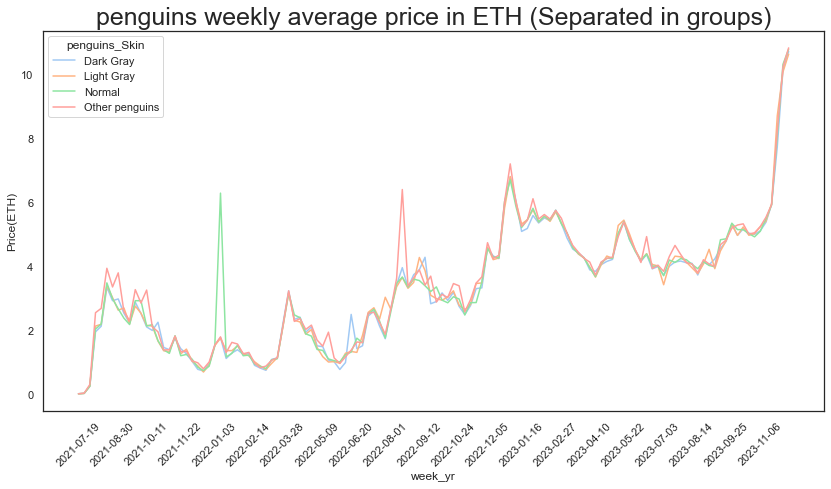

In [95]:
sns.set_theme(style="white", palette="pastel")
plt.figure(figsize=(14,7))
#a = sns.lineplot(box_group, x='Month_year', y='price',hue='marketplace_event_type')
a = sns.lineplot(linechart[:len(linechart)-4], x='week_yr', y='price.amount.decimal', markers= True, hue='penguins_Skin')
a.set(ylabel='Price(ETH)')
plt.title('penguins weekly average price in ETH (Separated in groups)', fontsize =25)
#a.set_xticklabels(a.get_xticklabels() ,rotation=30)
a.tick_params(axis='x', labelrotation = 45)
a.xaxis.set_major_locator(plt.MaxNLocator(24))

In [46]:
penguins['orderSource'].value_counts()

orderSource
opensea.io         40342
blur.io            30423
looksrare.org       1087
sudoswap.xyz         705
nftx.io              421
element.market       345
x2y2.io              296
caviar.sh             45
gem.xyz               16
reservoir.tools        8
rarible.com            5
nft.mm                 3
story.xyz              3
spicefi.xyz            2
zora.co                1
nfttrader.io           1
magically.gg           1
Name: count, dtype: int64

In [97]:
a= penguins['orderSource'].copy()
a[a.isin(a.value_counts().index[4:])] = 'others'

In [98]:
penguins['OrderSource'] = a.copy()
a.value_counts()

orderSource
opensea.io       40342
blur.io          30423
others            1147
looksrare.org     1087
sudoswap.xyz       705
Name: count, dtype: int64

In [99]:
#hischart = penguins[penguins['price.currency.symbol'].isin(['ETH','WETH'])][['month','price.amount.decimal','OrderSource']].groupby( by= ['month','OrderSource'], as_index = False).sum()
#hischart['month'] =hischart['month'].astype(str)
hischart = penguins[penguins['price.currency.symbol'].isin(['ETH','WETH'])][['week_yr','price.amount.decimal','OrderSource']].groupby( by= ['week_yr','OrderSource'], as_index = False).sum()
hischart['month'] =hischart['week_yr'].astype(str)
hischart.head()

,week_yr,OrderSource,price.amount.decimal,month
0,2021-07-19,opensea.io,82.84584,2021-07-19
1,2021-07-26,opensea.io,102.85584,2021-07-26
2,2021-08-02,opensea.io,2293.65090,2021-08-02
3,2021-08-02,others,3.69369,2021-08-02
4,2021-08-09,opensea.io,17339.62779,2021-08-09


In [100]:
fig = px.bar(hischart, x='week_yr', y='price.amount.decimal',
             color='OrderSource', height=400)
fig.update_layout(title='ETH volume of penguins, by source',
                   width =1200, height = 600, bargap= 0.1,
                   xaxis_title='Week',
                   yaxis_title='ETH')
fig.show()

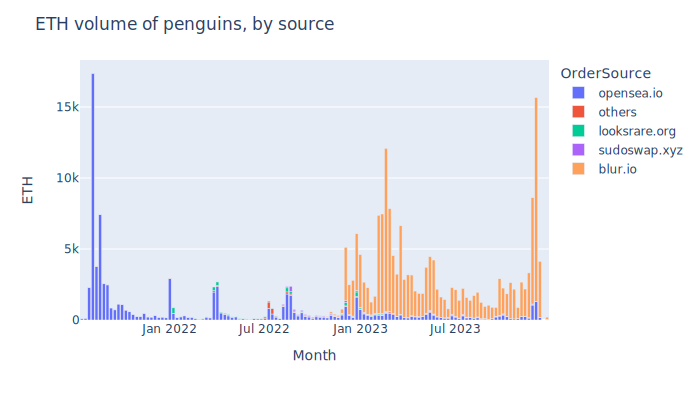

In [52]:
fig = px.bar(hischart, x='month', y='price.amount.decimal',
             color='OrderSource', height=400)
fig.update_layout(title='ETH volume of penguins, by source',
                   xaxis_title='Month',
                   yaxis_title='ETH')
fig.show(fig.show(renderer="svg"))

Check arbitrage activities

In [103]:
a = pd.Series(np.repeat(np.nan,len(penguins)), index=penguins.index)
b = pd.Series(np.repeat(np.nan,len(penguins)), index=penguins.index)

for i in penguins['token.tokenId'].unique():
    a.loc[penguins[penguins['token.tokenId'] == i].index] = penguins[penguins['token.tokenId'] == i]['timestamp'].diff()
    b.loc[penguins[penguins['token.tokenId'] == i].index] = penguins[penguins['token.tokenId'] == i]['price.amount.decimal'].diff()
penguins['time_diff'] = a
penguins['profit'] = b

#There are some negative value due to the order of API, so take absolute value instead, 87 trades is True
Counter(abs(pd.to_timedelta(a)) < pd.to_timedelta('0 days 00:00:02')) 

<ipython-input-103-f0d2e5fbe757>:5: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<TimedeltaArray>
[                  NaT, '-229 days +06:07:00',  '-66 days +19:23:48',
 '-185 days +12:32:18',   '-8 days +02:44:14',   '-6 days +01:26:08',
 '-184 days +02:05:23', '-127 days +15:22:32',  '-28 days +02:47:14',
  '-34 days +01:28:22',   '-4 days +03:46:21']
Length: 11, dtype: timedelta64[ns]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



Counter({False: 82474, True: 137})

In [104]:
bots = penguins[abs(pd.to_timedelta(penguins['time_diff'])) < pd.to_timedelta('0 days 00:00:02')]
bots['profit'].value_counts().head(4) #Too many 0 profit, not interested
bots= bots[bots['profit'] != 0]
bots['absolute profit'] = abs(bots['profit'])

In [105]:
bot_address = pd.concat([bots['from'], bots['to']])
bot_address.value_counts()

0xef7f9d712a82ae54c6ece9d95b7e1ec7449747ed    12
0xa1c2ff024c313088ac9ec47ec68c67b2b5478035    11
0x24bd8305f6b062416059c9dfc249a6db724a79d4     8
0xbf8767602970cec551c437c605f828975a4ef525     8
0x17b70f6b0dd3bf1322f972e84531767b8574e47e     7
                                              ..
0x7db3e3f10fad9db3a2da202ddfe62e6a05b86087     1
0x190b55e0ab018149a60f6bc93236b961cc77f831     1
0xac3588609f3b4bbabdacc7a4c79b3da8d50c954d     1
0xba39bf5db0cc53337ffbf4ab2bd2c014f12d0ae2     1
0x0099fbbc14f50be74485028171cb790eaf80ebe2     1
Name: count, Length: 164, dtype: int64

In [106]:
bots[bots['absolute profit']> 0.01].shape

(128, 27)

In [107]:
bots[bots['absolute profit']> 0.01].head()

,orderSide,orderSource,orderKind,from,to,block,txHash,timestamp,washTradingScore,token.contract,...,Face,Head,Skin,month,week_yr,penguins_Skin,OrderSource,time_diff,profit,absolute profit
1032,ask,caviar.sh,caviar-v1,0xc3b839030afa3cea21acb4062beb6665e43ac86a,0x528ce4b72ff44ab0b60d624726295ed1c5235199,17606633.0,0x2e13ef93d8e4b721f2b671b5b7d5df4c91a3e3d1cf72...,2023-07-02 13:31:35,0.0,0xbd3531da5cf5857e7cfaa92426877b022e612cf8,...,Cute,Pirate Hat,Dark Gray,2023-07,2023-06-26,Dark Gray,others,0 days 00:00:00,-0.01517,0.01517
1858,ask,sudoswap.xyz,sudoswap,0xe36f09b918810ea53b9a3c45e9780a419f9c5747,0x0000007370af0000ad00be0efd2f1eb6e6e9d700,15438646.0,0x576336075e0903618e7b7309c916df1364ed4aefc5f8...,2022-08-30 05:50:50,0.0,0xbd3531da5cf5857e7cfaa92426877b022e612cf8,...,Scar,Mohawk Green,Normal,2022-08,2022-08-29,Normal,sudoswap.xyz,0 days 00:00:00,-0.07900,0.07900
2514,ask,opensea.io,wyvern-v2,0x11360f0c5552443b33720a44408aba01a809905e,0xef7f9d712a82ae54c6ece9d95b7e1ec7449747ed,13950032.0,0xad2cda5a0e93fb55b5283c61e00b277c90c1fbdc4620...,2022-01-06 05:32:51,0.0,0xbd3531da5cf5857e7cfaa92426877b022e612cf8,...,Mustache,Flat Cap Black,Normal,2022-01,2022-01-03,Normal,opensea.io,0 days 00:00:00,-0.14982,0.14982
3145,ask,opensea.io,seaport-v1.4,0x298ff8cf9628952166e72070c0a6dad962e98495,0xbbfb8588c36fd31b1b446fc55b9880ea6928b4ac,17047949.0,0x3884c633639930debae8a318464d00c1898c896808a1...,2023-04-14 21:11:59,0.0,0xbd3531da5cf5857e7cfaa92426877b022e612cf8,...,Beard,Durag Red,Light Gray,2023-04,2023-04-10,Light Gray,opensea.io,0 days 00:00:00,-0.01048,0.01048
5963,ask,blur.io,blur,0x298ff8cf9628952166e72070c0a6dad962e98495,0x24bd8305f6b062416059c9dfc249a6db724a79d4,16700527.0,0x398fd5e4cedb97a554b30b26f5de6cfd8cc49cd7dd9e...,2023-02-24 20:21:35,0.0,0xbd3531da5cf5857e7cfaa92426877b022e612cf8,...,Normal,Hat Blue,Maroon,2023-02,2023-02-20,Other penguins,blur.io,0 days 00:00:00,-0.02108,0.02108


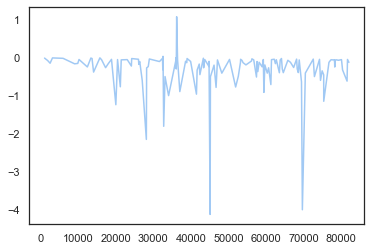

In [108]:
plt.plot(bots['profit'])

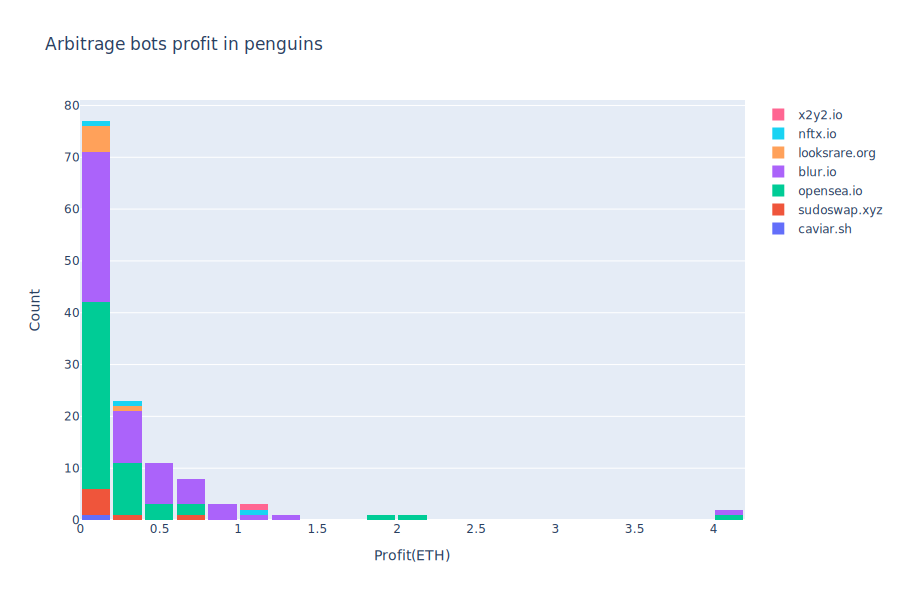

In [109]:
fig = go.Figure()
for i in bots['orderSource'].unique():
    fig.add_trace(go.Histogram(x=bots[bots['orderSource']== i]['absolute profit'], name= i ))
fig.update_layout(title_text = "Arbitrage bots profit in penguins", 
                  width =900, height = 600, bargap= 0.1,
                  xaxis_title_text='Profit(ETH)', yaxis_title_text='Count',
                  barmode = 'stack'
                  )
fig.show(renderer="svg")

In [110]:
fig = go.Figure()
for i in bots['orderSource'].unique():
    fig.add_trace(go.Histogram(x=bots[bots['orderSource']== i]['absolute profit'], name= i ))
fig.update_layout(title_text = "Arbitrage bots profit in penguins", 
                  width =900, height = 600, bargap= 0.1,
                  xaxis_title_text='Profit(ETH)', yaxis_title_text='Count',
                  barmode = 'stack'
                  )
fig.show()

In [111]:
#The 5 most profitable aribtrage trades in penguins
bots[['from', 'to','txHash', 'timestamp','price.amount.usd', 'token.tokenId','absolute profit']].loc[bots.sort_values('absolute profit', ascending=False).index[:5]]

,from,to,txHash,timestamp,price.amount.usd,token.tokenId,absolute profit
45146,0x5d7d6f679083f3ebfc6a510c418b4e1b2f754fae,0x50a269ff3238db9c60ac2205cf5268e009753de8,0x7fa8f0a63b313bc8121585c1b3482155b51292a0446b...,2023-06-13 03:17:23,0.00000,4990,4.12263
69717,0x70b51857fa6ac8df9b070ed692fe0c9432403fcc,0x9e9346e082d445f08fab1758984a31648c89241a,0x60d3c24df4586c1074b1708ffc46ba5ecc61780f7cb5...,2022-03-17 23:19:45,2660.88908,7569,4.00000
28155,0x5da69040cc34912cd0332418f409827eed42baa9,0x0000008682fa8c3aa14b11894e90e3dcbbff715b,0x603469cfa73441daf1c9517a3e28628926caf6bbc9a6...,2022-12-09 15:28:35,5445.14521,3083,2.15150
32775,0xf0cc8f80ec7ee1f3d91149ac2eb86c590b55e5c8,0xe9d70204a5984b01253856180e79257d1d458489,0x9aed5c2de8dd9d7a35bdd9242c7871a900eda52ffe46...,2022-01-06 21:26:51,4616.86428,3563,1.80755
20028,0xb149f353383ab92e74c4cba3feb848b04bfb3617,0xa1c2ff024c313088ac9ec47ec68c67b2b5478035,0x448a4fb0bfc5093eb76550af3e9d72b1cc76040a7e6e...,2022-12-26 10:55:35,4511.35947,2186,1.24005


Analysis of active address

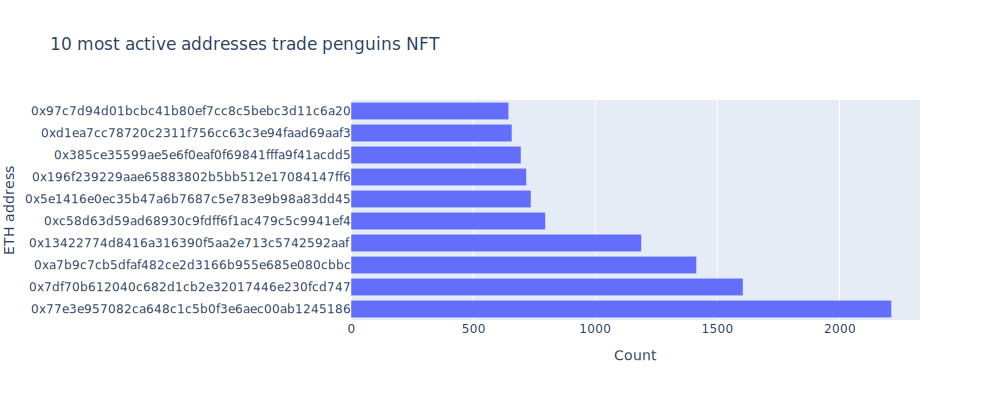

In [65]:

active = pd.concat((penguins['from'], penguins['to'])).value_counts()

#Address '0x020ca66c30bec2c4fe3861a94e4db4a498a35872' is in hot wallet address
active[1:11] #The first record is a mint address '0x0000000000000000000000000000000000000000'
fig = go.Figure()

fig.add_trace(go.Bar(y=active.index[1:11], x=active[1:11], name='contestant', orientation= 'h'))
fig.update_layout(title_text = "10 most active addresses trade penguins NFT", width=1000, height=400)
fig.update_yaxes(title_text="ETH address")
fig.update_xaxes(title_text="Count")
fig.show(renderer="svg")

In [66]:
#Address '0x020ca66c30bec2c4fe3861a94e4db4a498a35872' is in hot wallet address
active[1:11] #The first record is a mint address '0x0000000000000000000000000000000000000000'
fig = go.Figure()

fig.add_trace(go.Bar(y=active.index[1:11], x=active[1:11], name='contestant', orientation= 'h'))
fig.update_layout(title_text = "10 most active addresses trade penguins NFT", width=1000, height=400)
fig.update_yaxes(title_text="ETH address")
fig.update_xaxes(title_text="Count")
fig.show()

In [67]:
active[:11]

0x0000000000000000000000000000000000000000    8888
0x77e3e957082ca648c1c5b0f3e6aec00ab1245186    2213
0x7df70b612040c682d1cb2e32017446e230fcd747    1605
0xa7b9c7cb5dfaf482ce2d3166b955e685e080cbbc    1415
0x13422774d8416a316390f5aa2e713c5742592aaf    1189
0xc58d63d59ad68930c9fdff6f1ac479c5c9941ef4     796
0x5e1416e0ec35b47a6b7687c5e783e9b98a83dd45     737
0x196f239229aae65883802b5bb512e17084147ff6     718
0x385ce35599ae5e6f0eaf0f69841fffa9f41acdd5     696
0xd1ea7cc78720c2311f756cc63c3e94faad69aaf3     659
0x97c7d94d01bcbc41b80ef7cc8c5bebc3d11c6a20     646
Name: count, dtype: int64